### DS 3000 - Assignment 4

**Student Name**: [Nafisa Tasnia]

**Date**: [2/6/2024]

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install fastparquet

## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [79]:
# Load the data into a dataframe

tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet', #provide the URL to the data source
                      engine = 'fastparquet')

## 2. Inspect the Data (5 pts) 
Inspect the data and perform the following: 
1. display the dimensions, and indicate if the variables have suitable types.
2. convert all variables to suitable types

In [80]:
# Displays dimensions 
tripdata_df.shape

(64809, 20)

In [81]:
# shows what the datatypes are set to currently. Will help us figure out which variables 
# need to be changed based on the data dictionary
print(tripdata_df.dtypes)

VendorID                        float64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                    float64
DOLocationID                    float64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object


In [82]:
# The following variables did not have suitable types thus the next few lines converts all
# those variables to be converted to suitable types using pd.to_numeric

In [83]:
tripdata_df['VendorID'] = pd.to_numeric(tripdata_df['VendorID'], errors='coerce', downcast='integer')

In [84]:
tripdata_df['passenger_count'] = pd.to_numeric(tripdata_df['passenger_count'], errors='coerce', downcast='integer')

In [85]:
tripdata_df['RatecodeID'] = pd.to_numeric(tripdata_df['RatecodeID'], errors='coerce', downcast='integer')

In [86]:
tripdata_df['PULocationID'] = pd.to_numeric(tripdata_df['PULocationID'], errors='coerce', downcast='integer')

In [87]:
tripdata_df['DOLocationID'] = pd.to_numeric(tripdata_df['DOLocationID'], errors='coerce', downcast='integer')

In [88]:
tripdata_df['payment_type'] = pd.to_numeric(tripdata_df['payment_type'], errors='coerce', downcast='integer')

In [89]:
tripdata_df['trip_type'] = pd.to_numeric(tripdata_df['trip_type'], errors='coerce', downcast='integer')

In [90]:
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].map({'Y': True, 'N': False}).astype(bool)

## 3. Types of Data (2 pts) 
Are there any categorical data in this dataset. If they exist, demonstrate at least two categorical variables and indicate if they are nominal or ordinal (hint: read the data dictionary above which describes all fields in the data)

Nominal: store_and_fwd_flag because it doesn't have any order or ranking. The variable also has disctinct label of either Y or N.

Ordinal: RatecodeID because there is order and the sequence has meaning. For example, standard rate might be considered base level while the other values might represent more meaningful service to taxi drivers, thus it can be ordered with intention. Overall they are ranked/ have meaning. 

## 4. Missing Values (10 pts) 
Evaluate the frequency of missing values in the dataset and perform the following:
1. explain if missing values are an isolated case or a widespread issue? 
2. what method would you recommend to handle missing data?
3. write the suitable code to handle the missing values.

1. Missing values is a widespread issue because you use the isnull function you 
can see that many of the variables have many missing values. Along with this ehail_fee is just all Nan. This means missing values is a widespread issue. I would personally drop ehail_fee coloumn as it's all Nan. Then I would use dropna function to drop Nan that are found in the rows.

In [91]:
# Drop the "ehail_fee" column from the DataFrame with drop function
tripdata_df.drop(columns=["ehail_fee"], axis=0, inplace=True)

In [92]:
# Helps drop rows with missing values using dropna function
tripdata_df.dropna(axis=0,inplace=True)

## 5. Invalid Data (10 pts) 
Explore the data to determine if there are any invalid values and perform the following: 
1. demonstrate at least three issues that you found.
2. write suitable code to handle the invalid data that you found.

In [93]:
# Many of the coloumns like fare amount and tip amount have negative values that need to be adressed
# (These are two issues that fare amount and then tip amount have negative values

In [94]:
negative_values = (tripdata_df[['fare_amount', 'tip_amount']] < 0).sum()

In [95]:
# demonstrated here 
print(negative_values)

fare_amount    182
tip_amount       5
dtype: int64


In [58]:
# (3rd issue) Then there are 0 in trip distance yet fare_amount says that rows fare amount is $10 like row 5

In [59]:
# counts the number of rows where trip_distance is 0
unrealistic_trip_distance = (tripdata_df['trip_distance'] == 0).sum()
# Count the number of rows where fare_amount is 0 or greater than 500
unrealistic_fare_amount = ((tripdata_df['fare_amount'] == 0) | (tripdata_df['fare_amount'] > 500)).sum()

In [60]:
# demonstrated here
print("The total of rows where trip distance is 0:", unrealistic_trip_distance)
print("The total of rows where fare amount is 0 or greater than 500:", unrealistic_fare_amount)

The total of rows where trip distance is 0: 2703
The total of rows where fare amount is 0 or greater than 500: 93


In [61]:
# gets the median for these coloumns 
median_fare_amount = tripdata_df['fare_amount'].median()
median_tip_amount = tripdata_df['tip_amount'].median()
median_trip_distance = tripdata_df['trip_distance'].median()

# Imputating for negative fare amount and trip amount
tripdata_df.loc[tripdata_df['fare_amount'] < 0, 'fare_amount'] = median_fare_amount
tripdata_df.loc[tripdata_df['tip_amount'] < 0, 'tip_amount'] = median_tip_amount

# Imputating for 0 miles
tripdata_df.loc[tripdata_df['trip_distance'] <= 0, 'trip_distance'] = median_trip_distance

# replacing less than or equal to 0 with the median fare amount
tripdata_df.loc[tripdata_df['fare_amount'] <= 0, 'fare_amount'] = median_fare_amount

In [74]:
# this shows how all the issues are resolved as trip distance and fare amount now doesn't have any of the 0's
print(unrealistic_trip_distance)
print(unrealistic_fare_amount)

0
0


<span style='color:red'>**Answer the following questions using the prepared data.**</span>

## 6. Data Visualization (10 pts) 
Create bar charts that show: 
1. the most common way that New Yorkers request/hail a cab. 
2. the most common pick-up locations (display the top 5 locations). 
3. the most common drop-off locations (display the top 5 locations). 

Explain each chart.

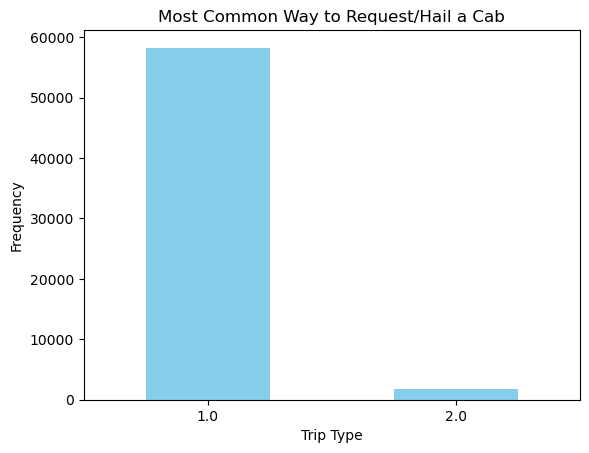

In [63]:
# Creates bar chart of the most common way that New Yorkers request/hail a cab
trip_type = tripdata_df['trip_type'].value_counts()
trip_type.plot(kind='bar', color='skyblue')
plt.title('Most Common Way to Request/Hail a Cab')
plt.xlabel('Trip Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

The chart reveals that trip type 1, also known as street hail, is the predominant method for requesting or hailing a cab, while trip type 2, Dispatch, is the least common. The disparity between the two trip types is substantial, with street hail being approximately 50,000 times more frequent than dispatch.

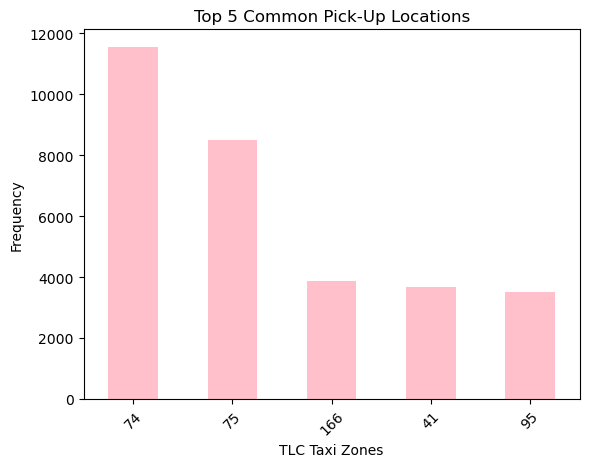

In [64]:
# Creates bar chart for the most common 5 pick-up locations
pickup = tripdata_df['PULocationID'].value_counts().head(5)
pickup.plot(kind='bar', color='pink')
plt.title('Top 5 Common Pick-Up Locations')
plt.xlabel('TLC Taxi Zones')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The bar chart of the top 5 common pick-up locations shows the frequency of taxi pickups across various zones. Zone 74 emerges as the most common pick-up location, with a frequency approaching 11,000. Then Zone 75, the second most frequented area for pick-ups, records a lower frequency of around 8,000 trips.

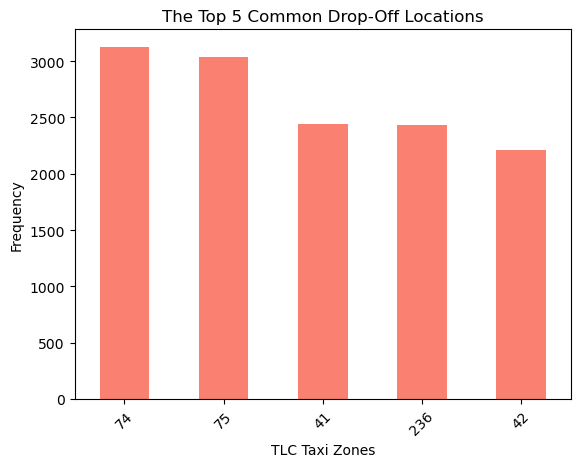

In [65]:
# Creates bar chart for the most common areas to drop off 
dropoff = tripdata_df['DOLocationID'].value_counts().head(5)
dropoff.plot(kind='bar', color='salmon')
plt.title('The Top 5 Common Drop-Off Locations')
plt.xlabel('TLC Taxi Zones')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The chart shows the top 5 areas where passengers are dropped off after their taxi trips. Interestingly, Zone 74 and Zone 75 emerge as the most common drop-off locations. What's noteworthy is the reversal in the trend compared to pick-up locations: while Zone 75 is more common for pick-ups, Zone 74 takes the lead for drop-offs.

## 7. Data Analysis (10 pts)
Write suitable code to answer the following:
1. On average, how far do New Yorkers usually travel using these taxis?
2. What is the most expensive and least expensive trip? 
3. What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)? 

Explain the results.

In [66]:
# finds how far average  New Yorkers usually travel;
averaging = tripdata_df["trip_distance"].mean()
print("On average New Yorkers travel", (round(averaging, 2)), "miles")

On average New Yorkers travel 2.78 miles


This suggests that, on average, most passengers will require a taxi ride covering a distance of 2.78 miles. This distance appears to be the most common among people who call or hail taxis in New York City.

In [67]:
# finds the most expensive and least expensive trip
maxing = tripdata_df["fare_amount"].max()
mining = tripdata_df["fare_amount"].min()
print("The most expensive trip is $", maxing)
print("The least expensive trip is $", mining)

The most expensive trip is $ 440.0
The least expensive trip is $ 0.01


This indicates that taxi trips in New york can vary signfiganctly in cost, ranging from 440 dollar to low as $0.01. The least expensive trip seems innaccurate because it's highly unlikely for a taxi trip to only cost a penny. The wide range of fares highlights the diversity in pricing for taxi rides.

In [68]:
# Filter trips where trip distance is less than 2 miles
short_trips = tripdata_df[tripdata_df['trip_distance'] < 2]

# Calculate statistics for tip amounts for trips under 2 miles
min_tip = short_trips['tip_amount'].min()
avg_tip = short_trips['tip_amount'].mean()
max_tip = short_trips['tip_amount'].max()


# Print the results
print("For trips under 2 miles:")
print("Minimum tip amount:", min_tip)
print("Average tip amount:", (round(avg_tip,2)))
print("Maximum tip amount:", (round(max_tip,2)))

For trips under 2 miles:
Minimum tip amount: 0.0
Average tip amount: 1.32
Maximum tip amount: 80.0


The maximum tip amount a taxi driver in New York can receive while driving their passenger under 2 miles is 80 dollars, while the average tip amount is 1 dollar and 32 cents. It seems reasonable to assume that the average tip is about a dollar. On the lower end, some trips may not yield any tip, as indicated by a minimum tip amount of $0.

In [69]:
# Filter trips where trip distance is greater than or equal to 2 miles
long_trips = tripdata_df[tripdata_df['trip_distance'] >= 2]

# Calculate statistics for tip amounts for trips over 2 miles
min_tips = long_trips['tip_amount'].min()
mean_tips = long_trips['tip_amount'].mean()
max_tips = long_trips['tip_amount'].max()

print("For trips over 2 miles:")
print("Minimum tip amount:", min_tips)
print("Average tip amount:", (round(mean_tips,2)))
print("Maximum tip amount:", (round(max_tips,2)))



For trips over 2 miles:
Minimum tip amount: 0.0
Average tip amount: 2.99
Maximum tip amount: 75.82


When taxi drivers transport passengers over distances exceeding two miles, they can anticipate receiving a maximum tip of 75 dollars and 82 cents, with the average tip being $2.99. Despite trips exceeding two miles, some drivers may not receive any tips at all.

## 8. Findings (3 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

Based on the preliminary analysis, it appears that this dataset may not be a viable source for understanding how New Yorkers use taxis due to several reasons. Firstly, significant cleanup is required, as indicated by the numerous errors and inconsistencies present in the data. Although the assignment mentions three issues, there are many more issues that cast doubt on the reliability of the dataset. For instance, the total amount does not display the correct total that you should get after summing all the columns related to cost. Also this reports that the least expensive trip is $0.01. This is unrealistic and contradicts common knowledge about taxi fares in New York City. Given the extensive cleanup needed, there is a risk that even after addressing known issues, there may be underlying problems that will go undetected. Therefore, using this dataset for future analysis may not be as advisable until the data quality issues are thoroughly resolved.